In [1]:
#importer les librairies qu'il faut
#NUMPY
import numpy as np
#PANDAS
import pandas as pd
#PYPLOT et CM pour la visualisation et la coloration
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from datetime import datetime
#  s'assure que tous les tracés apparaissent en ligne dans le notebook.

In [2]:
#GRAPHIQUE DES ACCIDENTS PAR AN

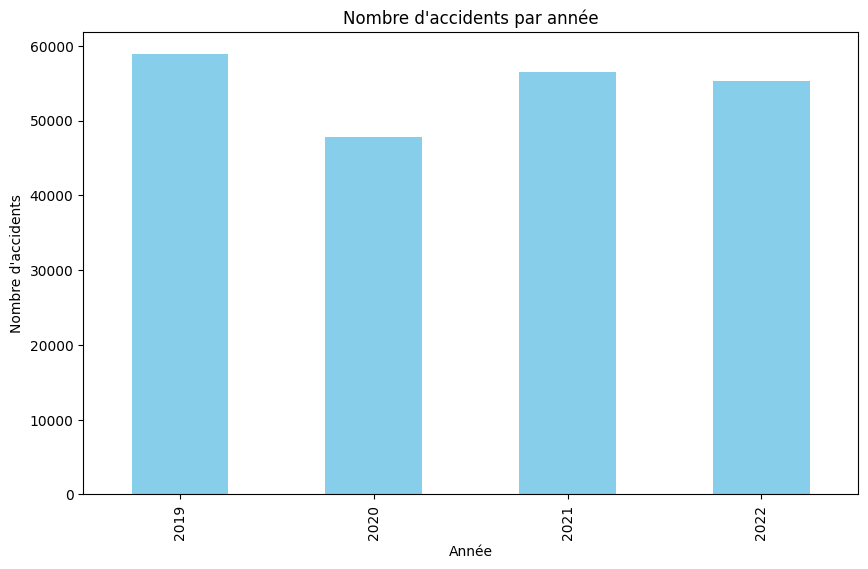

In [3]:
#Uploader les fichiers
data_1 = pd.read_csv('./2022/carcteristiques-2022.csv', delimiter=';')
data_2 = pd.read_csv('./2021/carcteristiques-2021.csv', delimiter=';')
data_3 = pd.read_csv('./2020/caracteristiques-2020.csv', delimiter=';')
data_4 = pd.read_csv('./2019/caracteristiques-2019.csv', delimiter= ';')

#Concaténer les DataFrames
all_data = pd.concat([data_1, data_2,data_3, data_4])

# Convertir la colonne 'an' en type datetime
all_data['an'] = pd.to_datetime(all_data['an'], format='%Y')

# Grouper par année et compter le nombre d'accidents
accidents_par_annee = all_data.groupby(all_data['an'].dt.year).size()

# Tracer le graphique
plt.figure(figsize=(10, 6))
accidents_par_annee.plot(kind='bar', color='skyblue')
plt.xlabel('Année')
plt.ylabel('Nombre d\'accidents')
plt.title('Nombre d\'accidents par année')
plt.show()

In [4]:
#GRAPH DES ACCIDENTS PAR AN EN FONCTION DES CATEGORIES DE VEHICULES IMPLIQUES

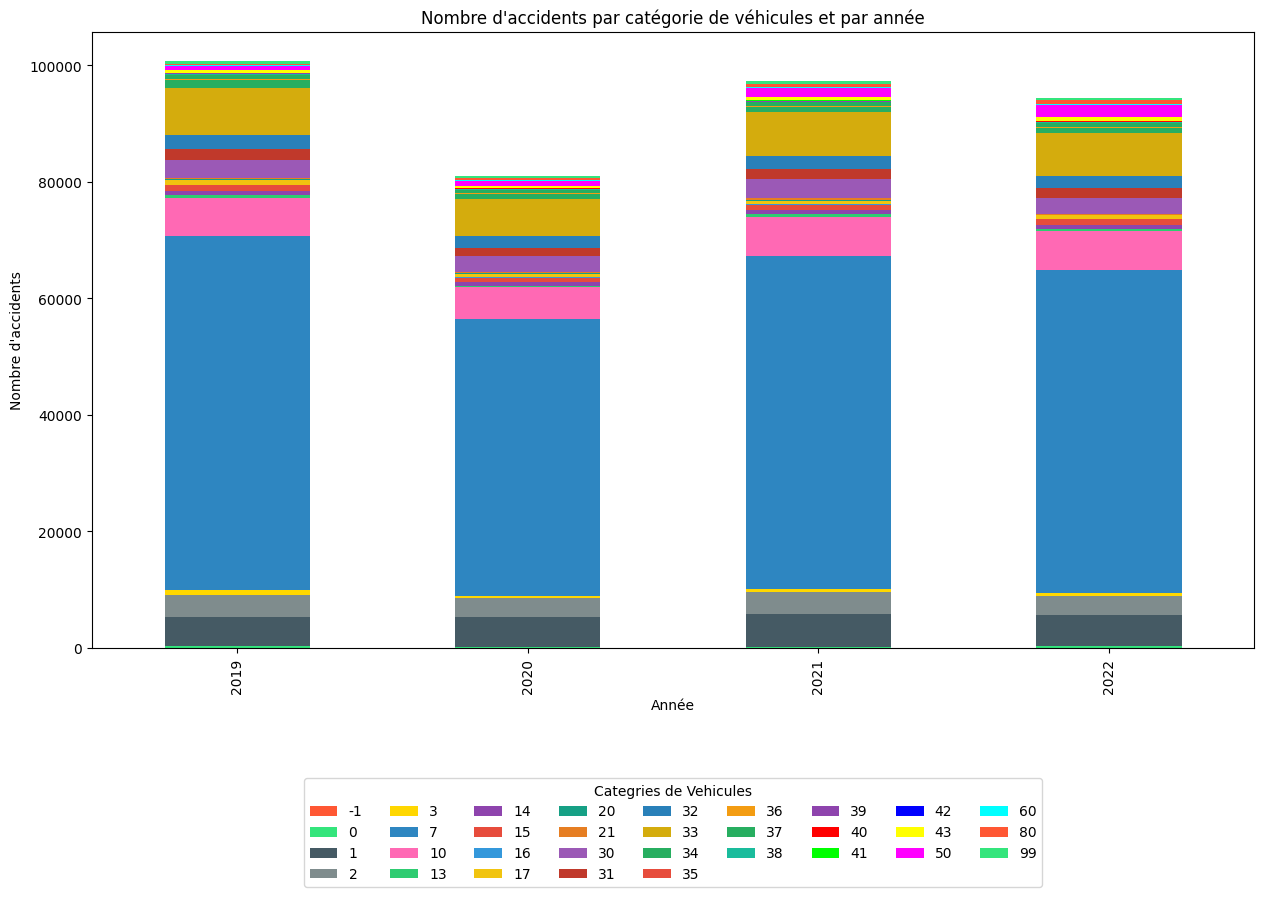

In [5]:
files = ['./2022/vehicules-2022.csv', './2021/vehicules-2021.csv', './2020/vehicules-2020.csv', './2019/vehicules-2019.csv']

#Initalisation du DataFrame Vide
all_data = pd.DataFrame()

# Charger et concaténer les données de chaque fichier
for file in files:
    data = pd.read_csv(file, delimiter=';')
    
    data['an'] = data['Num_Acc'].astype(str).str[:4]
    data['an'] = pd.to_datetime(data['an'], format='%Y')
    
    all_data = pd.concat([all_data, data])

# Grouper par année et par catégorie de véhicules et compter le nombre d'accidents
accidents_par_annee_cat = all_data.groupby([all_data['an'].dt.year, 'catv']).size().unstack()

#Tableau de couleurs pour le graph
custom_colors = ['#FF5733', '#34E57C', '#455A64', '#7F8C8D', '#FFD700', '#2E86C1', '#FF69B4', '#2ECC71', '#8E44AD', '#E74C3C',
'#3498DB', '#F1C40F', '#16A085', '#E67E22', '#9B59B6', '#C0392B', '#2980B9', '#D4AC0D', '#27AE60', '#E74C3C',
'#F39C12', '#27AE60', '#1ABC9C', '#8E44AD', '#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF',
'#FF5733', '#34E57C', '#455A64', '#7F8C8D', '#FFD700', '#2E86C1', '#FF69B4', '#2ECC71', '#8E44AD', '#E74C3C',
'#3498DB', '#F1C40F', '#16A085', '#E67E22', '#9B59B6', '#C0392B', '#2980B9', '#D4AC0D', '#27AE60', '#E74C3C',
'#F39C12', '#27AE60', '#1ABC9C', '#8E44AD', '#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF',
'#FF5733', '#34E57C', '#455A64', '#7F8C8D', '#FFD700', '#2E86C1', '#FF69B4', '#2ECC71', '#8E44AD', '#E74C3C',
'#3498DB', '#F1C40F', '#16A085', '#E67E22', '#9B59B6', '#C0392B', '#2980B9', '#D4AC0D', '#27AE60', '#E74C3C',
'#F39C12', '#27AE60', '#1ABC9C', '#8E44AD', '#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF']

#Tracer le graph
accidents_par_annee_cat.plot(kind='bar', figsize=(15, 8), color=custom_colors, stacked=True)
plt.legend(title='Categries de Vehicules', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=9)
plt.xlabel('Année')
plt.ylabel('Nombre d\'accidents')
plt.title('Nombre d\'accidents par catégorie de véhicules et par année')
plt.show()


In [6]:
#Graphique des Accidents en proportions des conducteurs implique

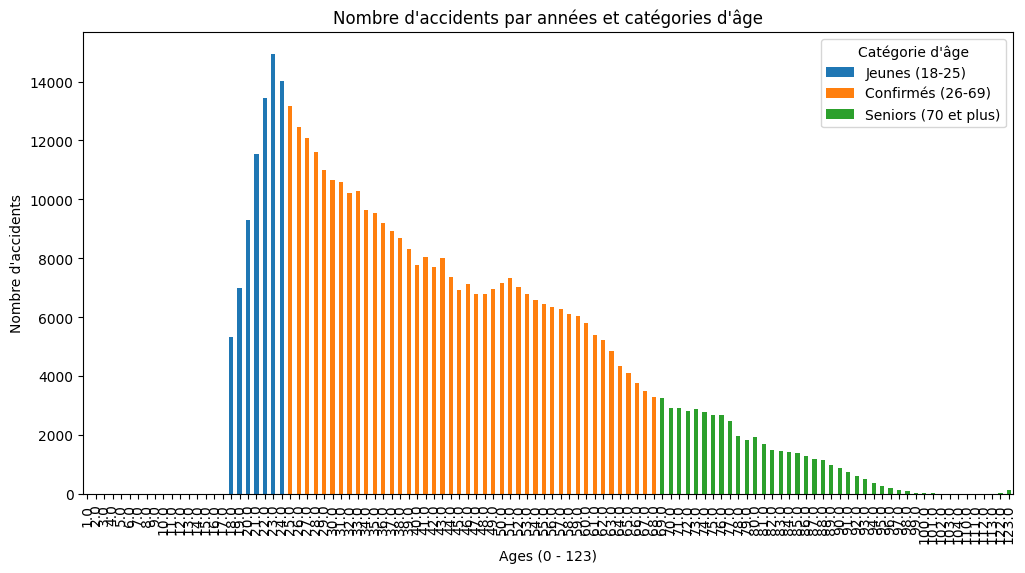

In [7]:
#Uploader le chemin vers les fichiers
files = ['./2022/usagers-2022.csv', './2021/usagers-2021.csv', './2020/usagers-2020.csv', './2019/usagers-2019.csv']

#Initalisation du DataFrame Vide
all_data = pd.DataFrame()

for file in files:
    data = pd.read_csv(file, delimiter=';')
    all_data = pd.concat([all_data, data])

#Calculer l'age des conducteurs a partir des 4 premiers chiffres de la colonne Num_Acc et les valeurs de la colonne an_nais
all_data['age'] = all_data['an_nais'].apply(lambda x: datetime.now().year - int(str(x)[:4]) if pd.notna(x) and str(x)[:4].isdigit() else None)

# Définir les catégories d'âge
bins = [18, 25, 69, 150]
labels = ['Jeunes (18-25)', 'Confirmés (26-69)', 'Seniors (70 et plus)']

# Ajouter une colonne de catégorie d'âge
all_data['cat_age'] = pd.cut(all_data['age'], bins=bins, labels=labels, right=False)

# Grouper par année et catégorie d'âge, et compter le nombre d'accidents
accidents_par_annee_age = all_data.groupby([all_data['age'], 'cat_age'], observed=False).size().unstack()

# Tracer le graphique
accidents_par_annee_age.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Nombre d\'accidents par années et catégories d\'âge')
plt.xlabel('Ages (0 - 123)')
plt.ylabel('Nombre d\'accidents')
plt.legend(title='Catégorie d\'âge')
plt.show()

In [8]:
#GRAPHIQUES DES ACCIDENTS DU AU COVID SUR LES ANNEES 2021 ET 2022

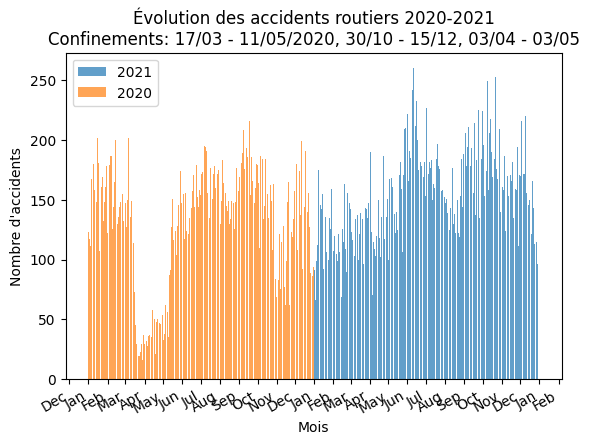

In [9]:
#Uploader les fichiers
f1 = './2021/carcteristiques-2021.csv'
f2 = './2020/caracteristiques-2020.csv'
dt1 = pd.read_csv(f1, delimiter=';')
dt2 = pd.read_csv(f2, delimiter=';')

#Grouper les elemenrts par An par mois et par jour
counts_by_day_2021 = dt1.groupby(['an', 'mois', 'jour']).size().reset_index(name='count')
counts_by_day_2020 = dt2.groupby(['an', 'mois', 'jour']).size().reset_index(name='count')
counts_by_day_2021['date'] = counts_by_day_2021.apply(lambda row: datetime(row['an'], row['mois'], row['jour']), axis=1)
counts_by_day_2020['date'] = counts_by_day_2020.apply(lambda row: datetime(row['an'], row['mois'], row['jour']), axis=1)

#Tracer le grpahique
bine = 2
plt.bar(counts_by_day_2021['date'], counts_by_day_2021['count'], label='2021', alpha=0.7)
plt.bar(counts_by_day_2020['date'], counts_by_day_2020['count'], label='2020', alpha=0.7)
plt.xlabel('Mois')
plt.ylabel('Nombre d\'accidents')
plt.title('Évolution des accidents routiers 2020-2021\nConfinements: 17/03 - 11/05/2020, 30/10 - 15/12, 03/04 - 03/05')
plt.legend()
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))
plt.gcf().autofmt_xdate()
plt.show()


In [10]:
#GRAPH DE COMPARAISON DES ACCIDENTS SUR LA ROUTE ENTRE LA FRANCE ET LES US SUR L'AN 2022

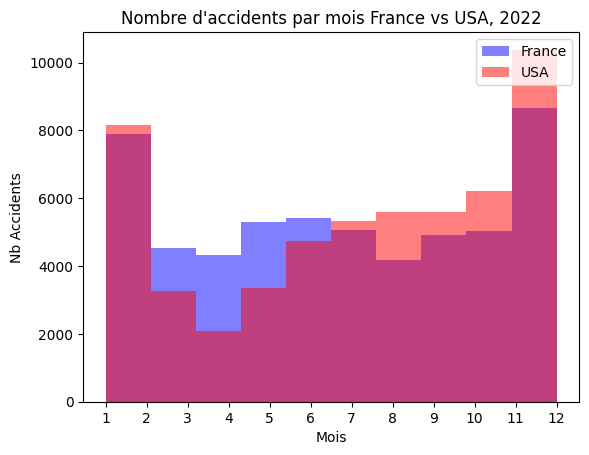

In [11]:
#Uploader les fichiers
f0 = './2022/carcteristiques-2022.csv'
f1 = './us2016-2023/acc_20.csv'
dt0 = pd.read_csv(f0, delimiter=';')
dt1 = pd.read_csv(f1, delimiter=',')

bine = 10
#Tracer le graphique
plt.hist(dt0['mois'], bins=bine, alpha=0.5, label='France', color='blue')
plt.hist(dt1['MONTH'], bins=bine, alpha=0.5, label='USA', color='red')
plt.xlabel('Mois')
plt.ylabel('Nb Accidents')
plt.legend(loc='upper right')
plt.title('Nombre d\'accidents par mois France vs USA, 2022')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.show()